In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

filterwarnings("ignore")

# Introduction
Sinking of the titanic one of the most notorious disaster in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable description](#2) 
1. [Exploratory Data Analysis (EDA)](#3)
    * [1.Univariate Visualization](#4)
        *  [1.1 Discrete Univariate Visualization ](#5)
        *  [1.2 Numeric Univariate Visualization ](#6)
        *  [Analysis Output (1)](#7)

    * [2.Examining the Data](#8)
        * [Analysis Output (2)](#9)
1. [Feature Engineering](#10)
1. [Data Preprocessing](#11)
    * [Outlier Detection](#12)
    * [Pipeline Steps](#13) 
    
1. [Creating Model and Submission](#14)

<a id = "1"></a><br>
# Load and Check Data

In [65]:
train_path = "/kaggle/input/titanic/train.csv"
test_path = "/kaggle/input/titanic/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [66]:
train_df.set_index('PassengerId',inplace=True)


<a id = "2"></a><br>
# Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [68]:
train_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [69]:
def dtype_translator(df,variable,dtype):
    df[variable] = df[variable].astype(dtype)


In [70]:
categoric_variables=['Pclass','Sex','Embarked']
for variable in categoric_variables:
    dtype_translator(train_df,variable,'category')
    dtype_translator(test_df,variable,'category')

dtype_translator(train_df,'Survived','object')

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    object  
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 65.6+ KB


<a id = "3"></a><br>
# Exploratory Data Analysis (EDA)



<a id = "4"></a><br>
## 1.Univariate Analysis

<a id = "5"></a><br>
### 1.1 Discrete Univariate Analysis

In [72]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.62963
2,0.472826
3,0.242363


In [73]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [74]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.38961
S,0.336957


In [75]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)


,Survived
Embarked,
C,0.553571
Q,0.38961
S,0.336957


In [76]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)


,Survived
Parch,
3,0.6
1,0.550847
2,0.5
0,0.343658
5,0.2
4,0.0
6,0.0


In [77]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.25
4,0.166667
5,0.0
8,0.0


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    object  
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 65.6+ KB


#### Let's visualize the data to understand it better

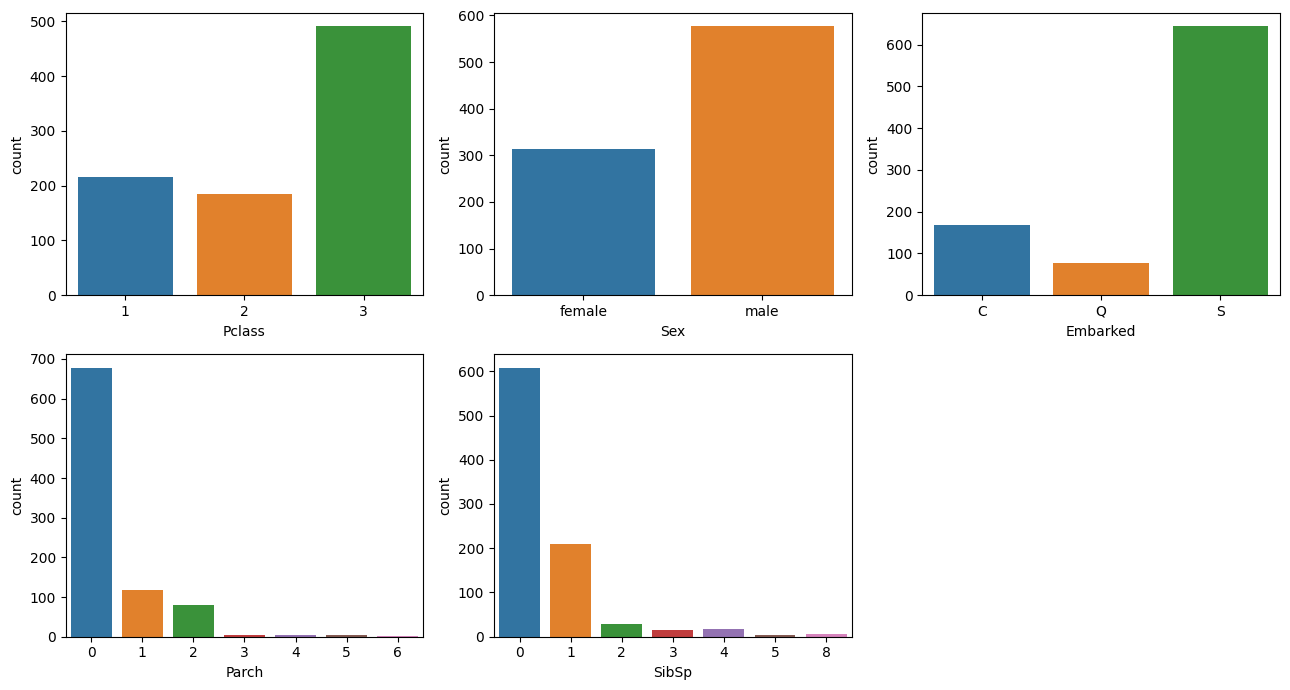

In [79]:
discrete_variables=['Pclass','Sex','Embarked','Parch','SibSp']
plt.figure(figsize=(13,7))
for i,discrete_variable in enumerate(discrete_variables,1):
    plt.subplot(2,3,i)
    sns.countplot(data=train_df,x=discrete_variable)
    plt.tight_layout()
    


<a id = "6"></a><br>
### 1.2 Numeric Univariate Analysis

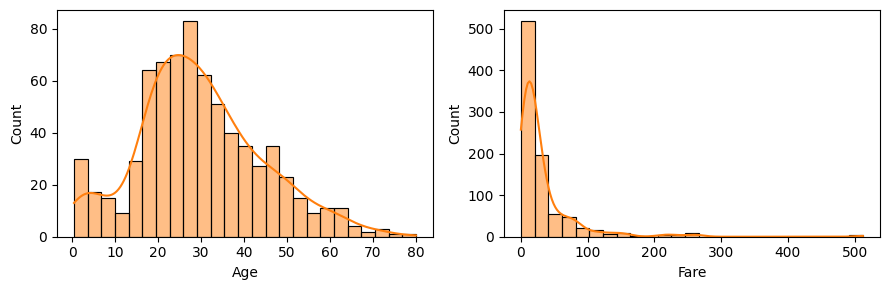

In [80]:
data_columns = ["Age", "Fare"]

fig, axs = plt.subplots(1,2, figsize=(9, 3))
color=sns.color_palette()[1]
for ax, column in zip(axs, data_columns):
    sns.histplot(train_df[column], bins=25, ax=ax, kde=True,color=color)

plt.tight_layout()
plt.show()


<a id ="7"></a><br>
### Analysis Outputs(1):
* Women have a higher survival rate than men
* It is clearly seen that those who buy 3rd class tickets have a higher mortality rate.
* Those who board from S and Q ports have a higher mortality rate
* While the Age variable shows a normal distribution, the Fare variable contains some outlier values.

<a id ="8"></a><br>
## 2.Examining the Data

In [81]:
train_df.columns[1:]

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

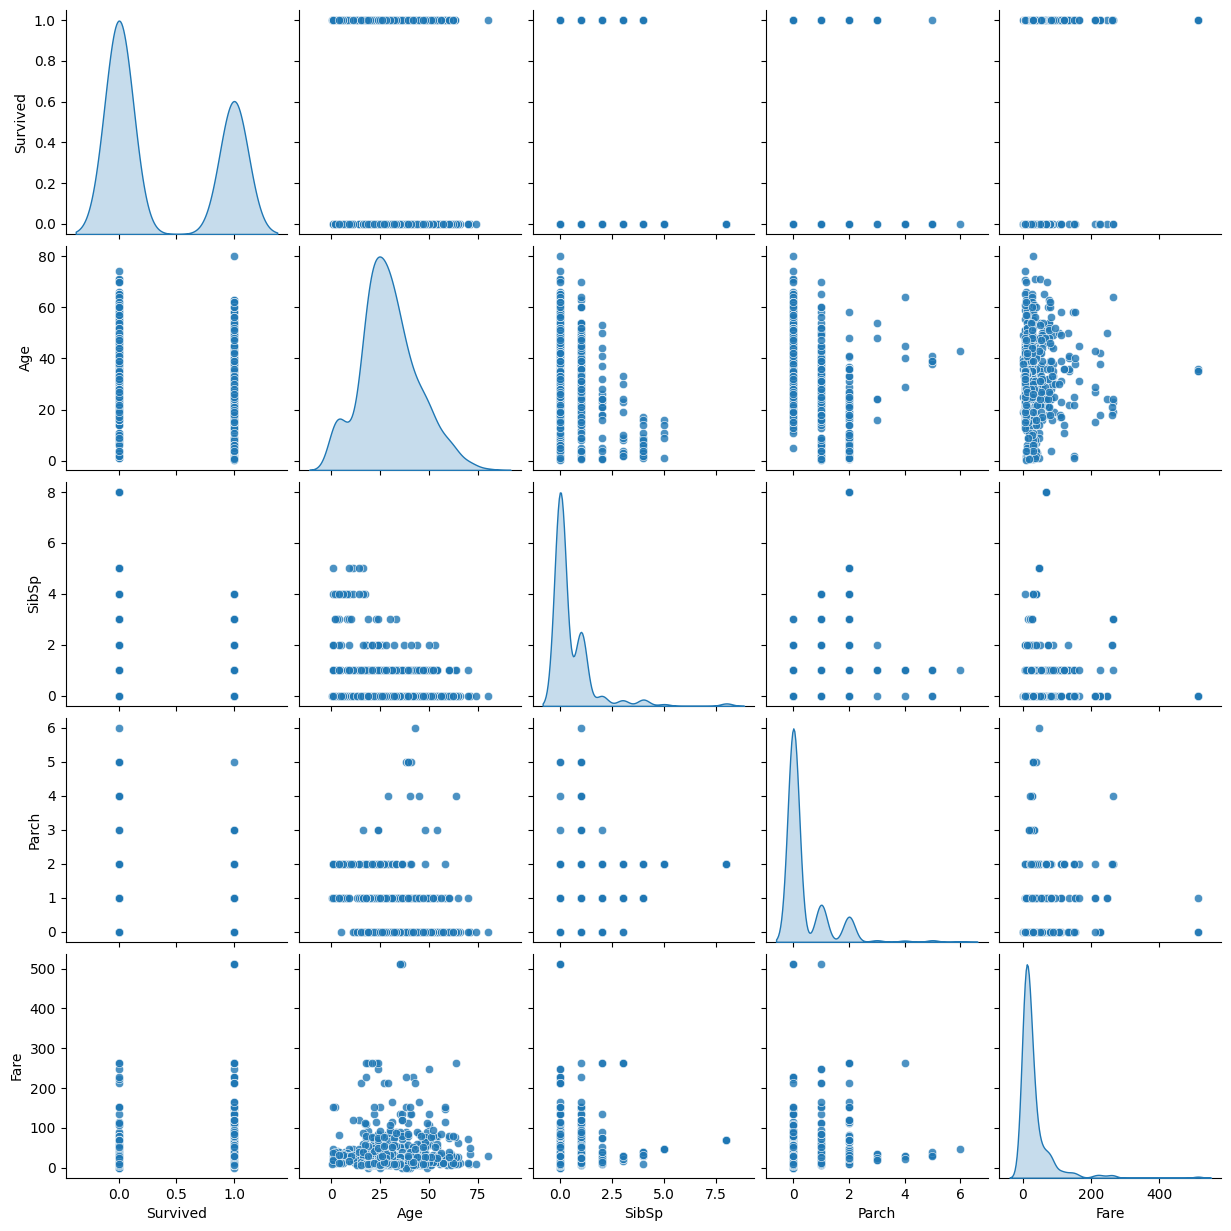

In [82]:

sns.pairplot(train_df,  diag_kind="kde", plot_kws={"alpha": 0.8});

In [83]:
survival_rates = train_df.groupby(['Sex','Survived'])['Fare'].mean()
sr_df=pd.DataFrame(survival_rates)
sr_df

Fare
Sex    Survived           
female 0         23.024385
       1         51.938573
male   0         21.960993
       1         40.821484

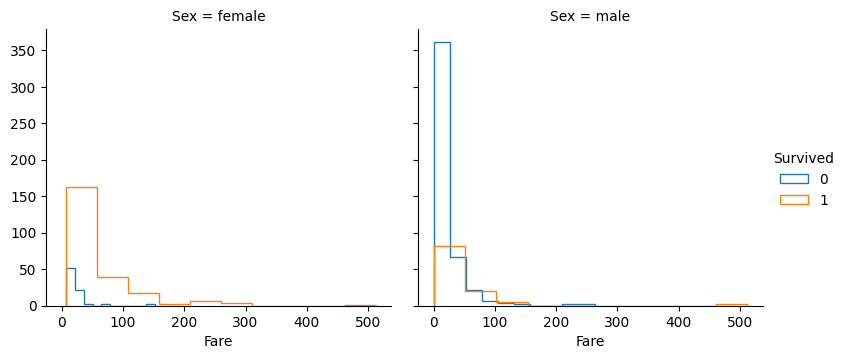

In [84]:
g=sns.FacetGrid(data=train_df,col='Sex',hue='Survived')
g.map(plt.hist,'Fare',histtype='step')
g.fig.set_size_inches(8, 4)
g.add_legend()
plt.show()


In [85]:
survival_rates = train_df.groupby(['Sex','Embarked'])['Survived'].mean()
sr_df=pd.DataFrame(survival_rates)
sr_df

Survived
Sex    Embarked          
female C         0.876712
       Q             0.75
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

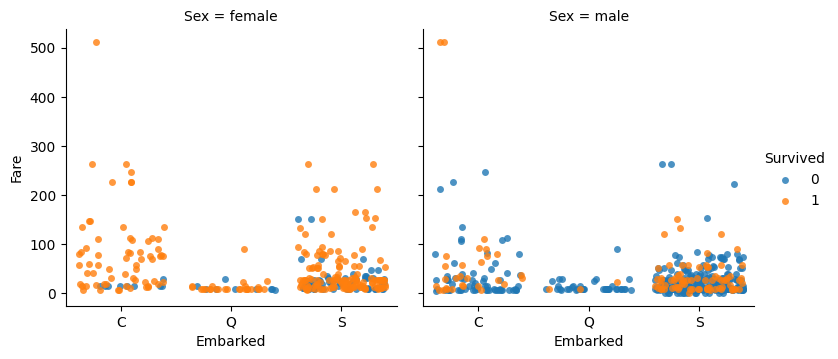

In [86]:
g=sns.FacetGrid(data=train_df,col='Sex',hue='Survived')
g.map(sns.stripplot,'Embarked','Fare',jitter=0.4,alpha=0.8)
g.fig.set_size_inches(8,4)
g.add_legend()
plt.show()

<a id ="9"></a><br>
### Analysis Outputs(2):
* Port C has higher survival rate

<a id ="10"></a><br>
# 4.Feature Engineering

We can combine the SibSp and Parch variables to obtain a new feature.

In [87]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


If we look at the name variable, the second words in each name variable may be meaningful because they express nicknames. We can assign them as a new variable.

In [88]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [89]:
train_df["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [90]:
test_df["Title"].value_counts()

Title
Mr        228
Miss      100
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: count, dtype: int64

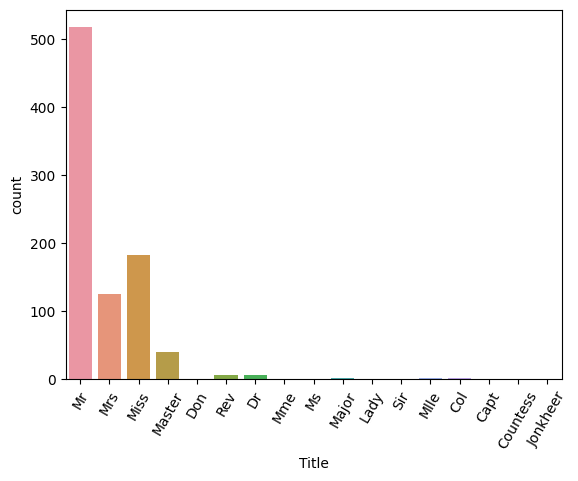

In [91]:
sns.countplot(data=train_df,x="Title")
plt.xticks(rotation=60);

Combining same the titles

In [92]:
train_df['Title'] = train_df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')

In [93]:
test_df['Title']= test_df['Title'].replace(['Dr', 'Rev', 'Don'], 'Others')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [94]:
drop_list=["Ticket","Cabin","Name"]

for drop_item in drop_list:
    train_df.drop([drop_item],axis=1,inplace=True)
    test_df.drop([drop_item],axis=1,inplace=True)


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    object  
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    category
 3   Age         714 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    889 non-null    category
 8   FamilySize  891 non-null    int64   
 9   Title       891 non-null    object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 91.0+ KB


<a id ="11"></a><br>
# 5.Data preprocessing

<a id ="12"></a><br>

## **Outlier Detection**

An [**outlier**](https://en.wikipedia.org/wiki/Outlier) is a data point that significantly differs from the other observations in a dataset. 


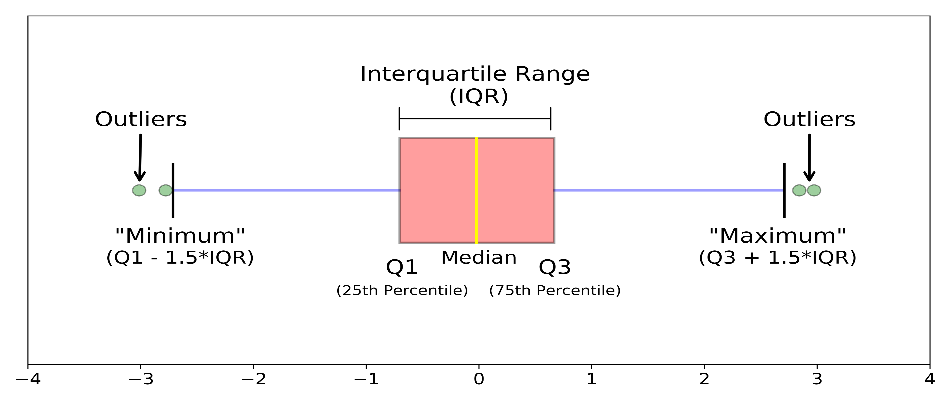

In [96]:


def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
    

In [97]:
outlier_features=["Age","SibSp","Parch","Fare"]

multiple_outliers=detect_outliers(train_df,outlier_features)

In [98]:
train_df.iloc[multiple_outliers]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
29,1,3,female,NaN,0,0,7.8792,Q,1,Miss
90,0,3,male,24.0,0,0,8.0500,S,1,Mr
161,0,3,male,44.0,0,1,16.1000,S,2,Mr
182,0,2,male,NaN,0,0,15.0500,C,1,Mr
203,0,3,male,34.0,0,0,6.4958,S,1,Mr
326,1,1,female,36.0,0,0,135.6333,C,1,Miss
343,0,2,male,28.0,0,0,13.0000,S,1,Mr
794,0,1,male,NaN,0,0,30.6958,C,1,Mr
848,0,3,male,35.0,0,0,7.8958,C,1,Mr


In [99]:
train_df.drop(index=multiple_outliers,inplace=True)

<a id ="13"></a><br>
## Pipeline steps

In order to easily transform data, we utilize scikit-learn's 3 components:
1. [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html): The `Imputer`, specifically the `SimpleImputer`, is used to handle missing values in your dataset. It provides several strategies for filling in missing values, such as using the mean, median, or the most frequent value from the column. Handling missing data appropriately is crucial because many machine learning algorithms cannot process missing values, and the choice of imputation strategy can significantly impact model performance.

1. [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline): A `Pipeline` allows you to create a sequence of data processing steps, including preprocessing and model training. This modular approach simplifies the workflow by encapsulating all transformations in a single object, making it easier to maintain and reproduce.

1. [ColumnTransformer](https://scikit-learn.org/stable/modules/compose.html#sklearn.compose.ColumnTransformer): The `ColumnTransformer` enables you to apply different preprocessing techniques to different columns of your dataset. For example, you can apply one-hot encoding to categorical features while simultaneously applying scaling to numerical features. This functionality allows you to handle heterogeneous data types within the same pipeline without altering the overall structure of your DataFrame.



In [100]:
numerical_columns=["Age","Fare","FamilySize"]
categorical_columns=["Pclass","Sex","Embarked","Title"]


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill null values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])



preprocessor = ColumnTransformer([
    ("numerical", numerical_transformer, numerical_columns),
    ("categorical", categorical_transformer, categorical_columns)
], remainder="drop") 


<a id ="14"></a><br>
## Creating Model and Submission

In [101]:
X = train_df.drop('Survived', axis=1)  
y = train_df['Survived']   

In [102]:
# We should encode the target value in order to avoid errors during model training and evaluation
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())  
])


In [105]:
pipeline.fit(X=X_train,y=y_train);

In [106]:
y_pred = pipeline.predict(X_test)

In [107]:
accuracy_score(y_pred,y_test)

0.832579185520362

In [108]:
predictions=pipeline.predict(test_df)

In [111]:
test_df.index

RangeIndex(start=0, stop=418, step=1)

In [114]:
# 5. Creating submission file
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})


In [116]:
submission_df.to_csv("submission.csv",index=False)